# Explore here

In [122]:
# Your code here

# Airbnb in New York
# A company has collected New York housing rental data from the Airbnb app during 2019. This dataset was used to train
# Machine Learning models during that year, in an open competition.
# 
# We will now use it to conduct a study about the variables that make up the dataset in order to understand it and draw
# conclusions about it.

import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")

total_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [123]:
# EDA

# Obtain dimensions
total_data.shape

(48895, 16)

In [124]:
# Obtain information about data types and non-null values
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [125]:
# Raw Analysis:  
# Dataset of 48 895 rows in 16 columns. 
# We notice that most columns have at least 48 800 values but two, 'last_review' and 'reviews_per_month' have only 38 843, given that
# not necesarilly all the housings have a review, we can presume that this is the cause# of the null values in these columns (near 10 000).
# The data has 10 numerical characteristics and 6 categorical characteristics.

In [126]:
# Eliminate duplicates

total_data.drop("id", axis = 1).duplicated().sum()

0

In [127]:
total_data['neighbourhood'].nunique()

221

In [128]:
total_data['neighbourhood'].value_counts()

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

In [129]:
# Eliminate irrelevant information

total_data.drop(["name", "host_name", "last_review"], axis = 1, inplace = True)
total_data.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


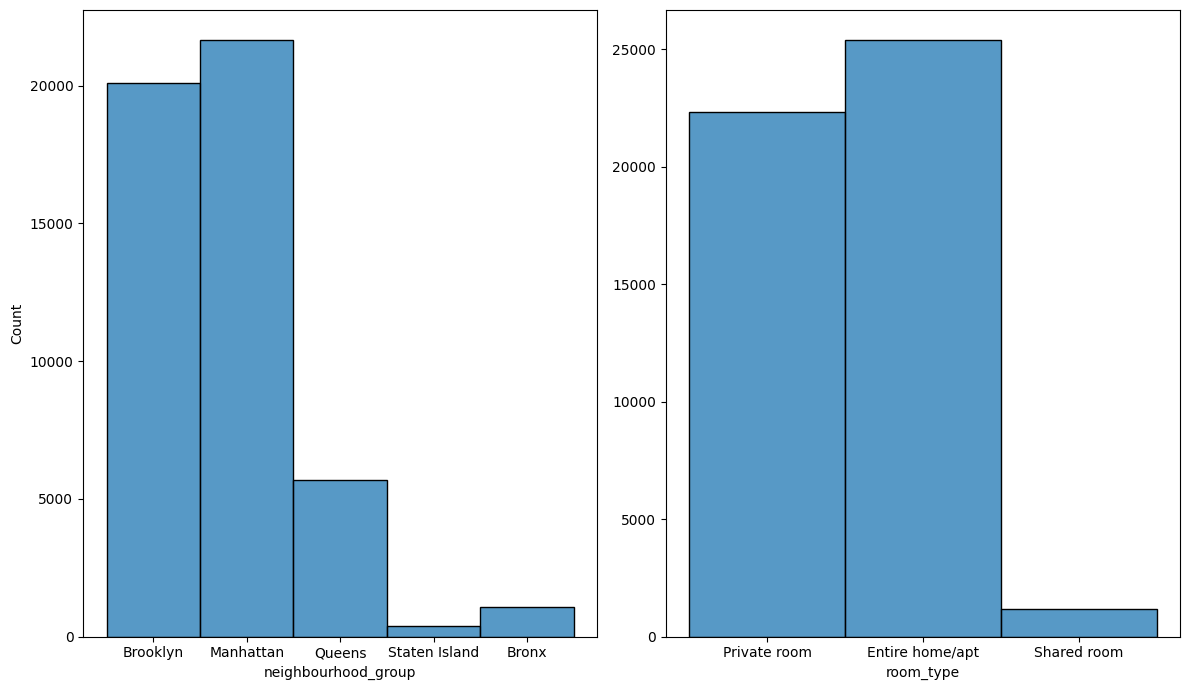

In [130]:
# Analysis on categorical variables        

import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(1, 2, figsize = (12, 7))

# Create a multiple histogram
sns.histplot(ax = axis[0], data = total_data, x = "neighbourhood_group")
sns.histplot(ax = axis[1], data = total_data, x = "room_type").set(ylabel = None)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


In [131]:
# neighbourhood_group: Brooklyn and Manhattan neighborhood groups are greater than the rest by a significant factor of eight.
# room_type: Entire Home/Apt exceeds the number of Private Room listings by nearly 2500, with Shared Room listings representing only a small fraction at the bottom.

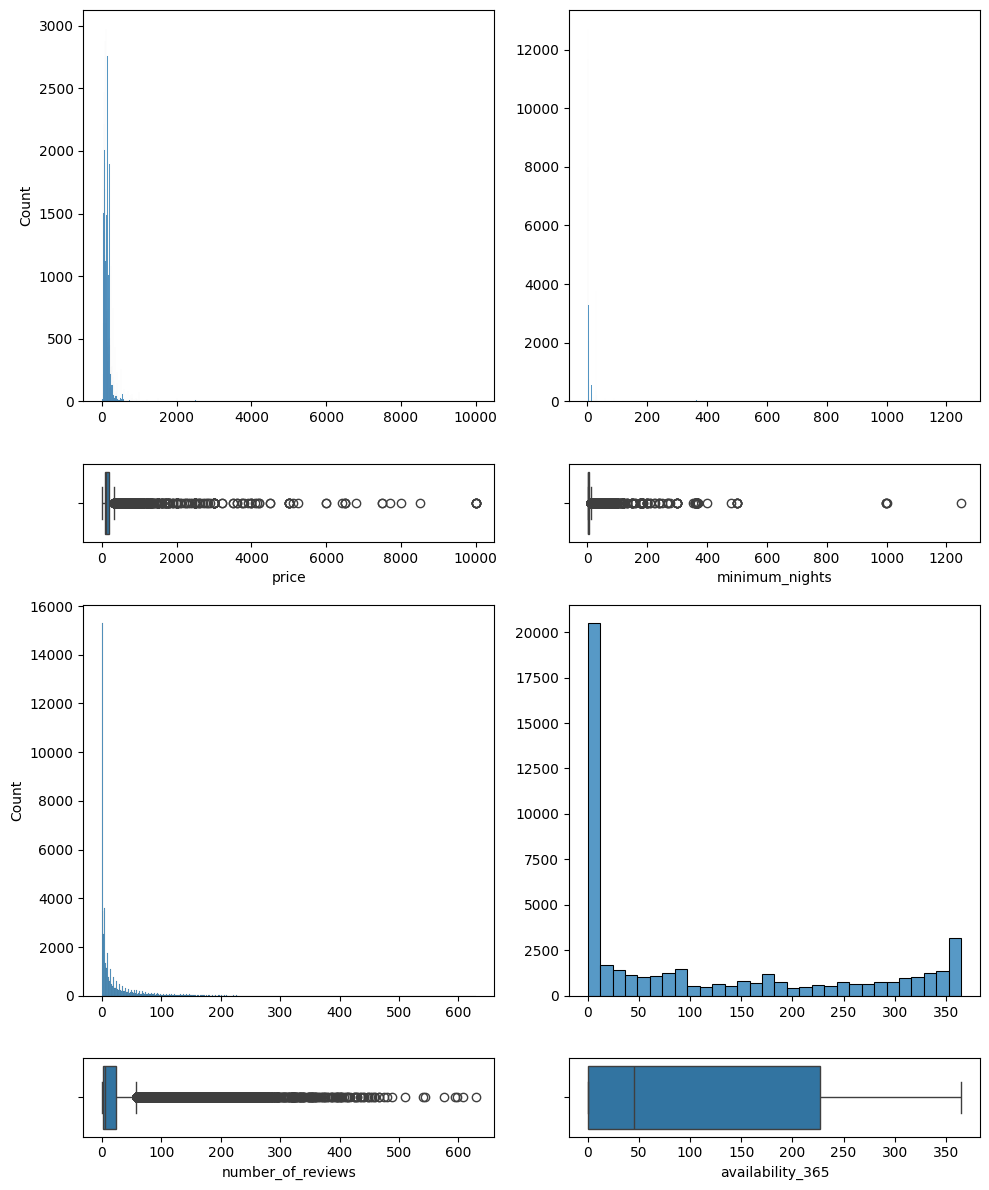

In [132]:
# Analysis on numeric variables

fig, axis = plt.subplots(4, 2, figsize = (10, 12), gridspec_kw={'height_ratios': [5, 1, 5, 1]})

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = total_data, x = "price").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "price")
sns.histplot(ax = axis[0, 1], data = total_data, x = "minimum_nights").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "minimum_nights")
sns.histplot(ax = axis[2, 0], data = total_data, x = "number_of_reviews").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = total_data, x = "number_of_reviews")
sns.histplot(ax = axis[2, 1], data = total_data, x = "availability_365").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = total_data, x = "availability_365")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

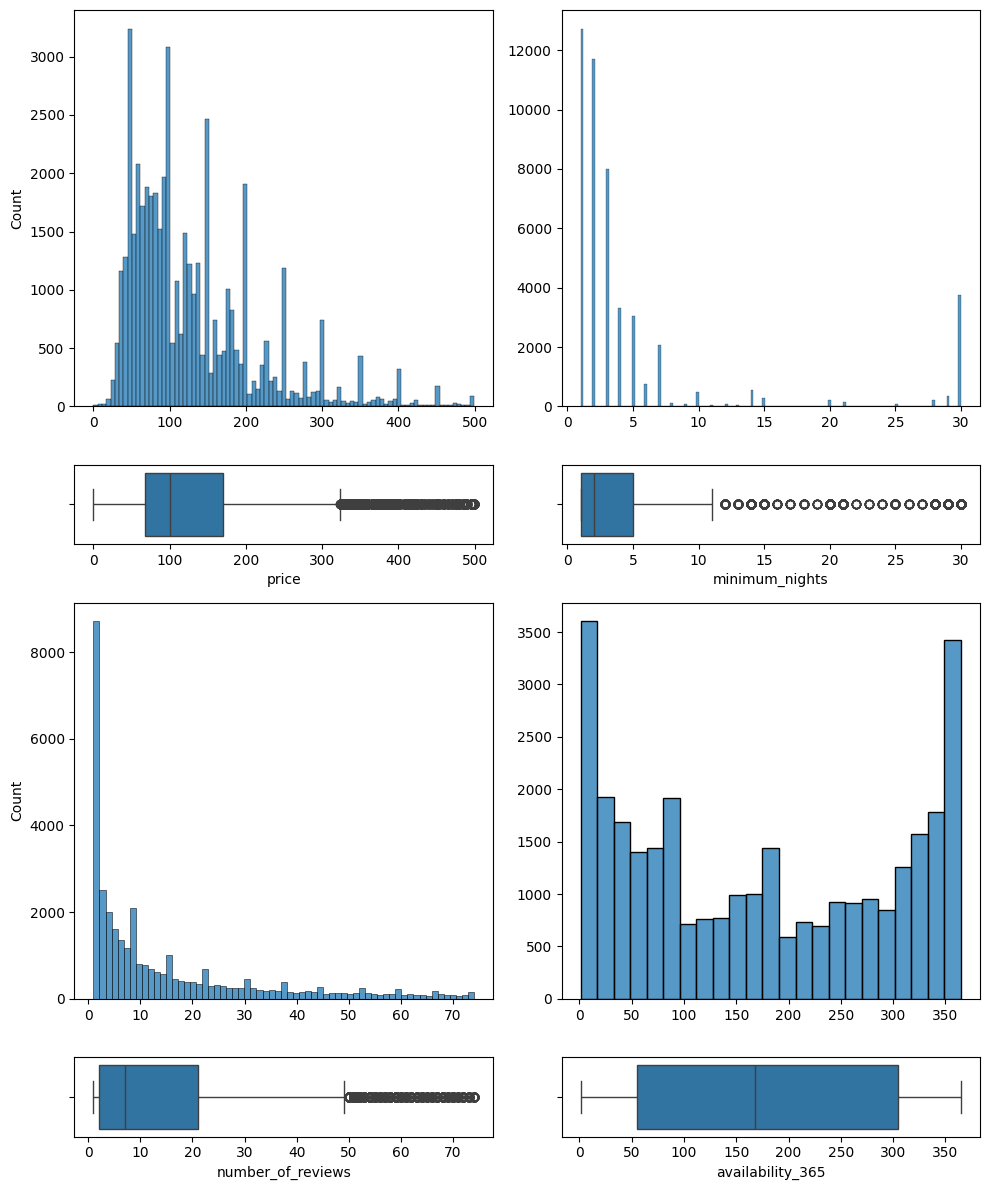

In [133]:
# Analysis on numeric variables

fig, axis = plt.subplots(4, 2, figsize = (10, 12), gridspec_kw={'height_ratios': [5, 1, 5, 1]})

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = total_data[total_data['price'] < 500], x = "price").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data[total_data['price'] < 500], x = "price")
sns.histplot(ax = axis[0, 1], data = total_data[(total_data['minimum_nights'] != 0) & (total_data['minimum_nights'] <= 30)], x = "minimum_nights").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data[(total_data['minimum_nights'] != 0) & (total_data['minimum_nights'] <= 30)], x = "minimum_nights")
sns.histplot(ax = axis[2, 0], data = total_data[(total_data['number_of_reviews'] != 0) & (total_data['number_of_reviews'] < 75)], x = "number_of_reviews").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = total_data[(total_data['number_of_reviews'] != 0) & (total_data['number_of_reviews'] < 75)], x = "number_of_reviews")
sns.histplot(ax = axis[2, 1], data = total_data[total_data['availability_365'] != 0], x = "availability_365").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = total_data[total_data['availability_365'] != 0], x = "availability_365")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

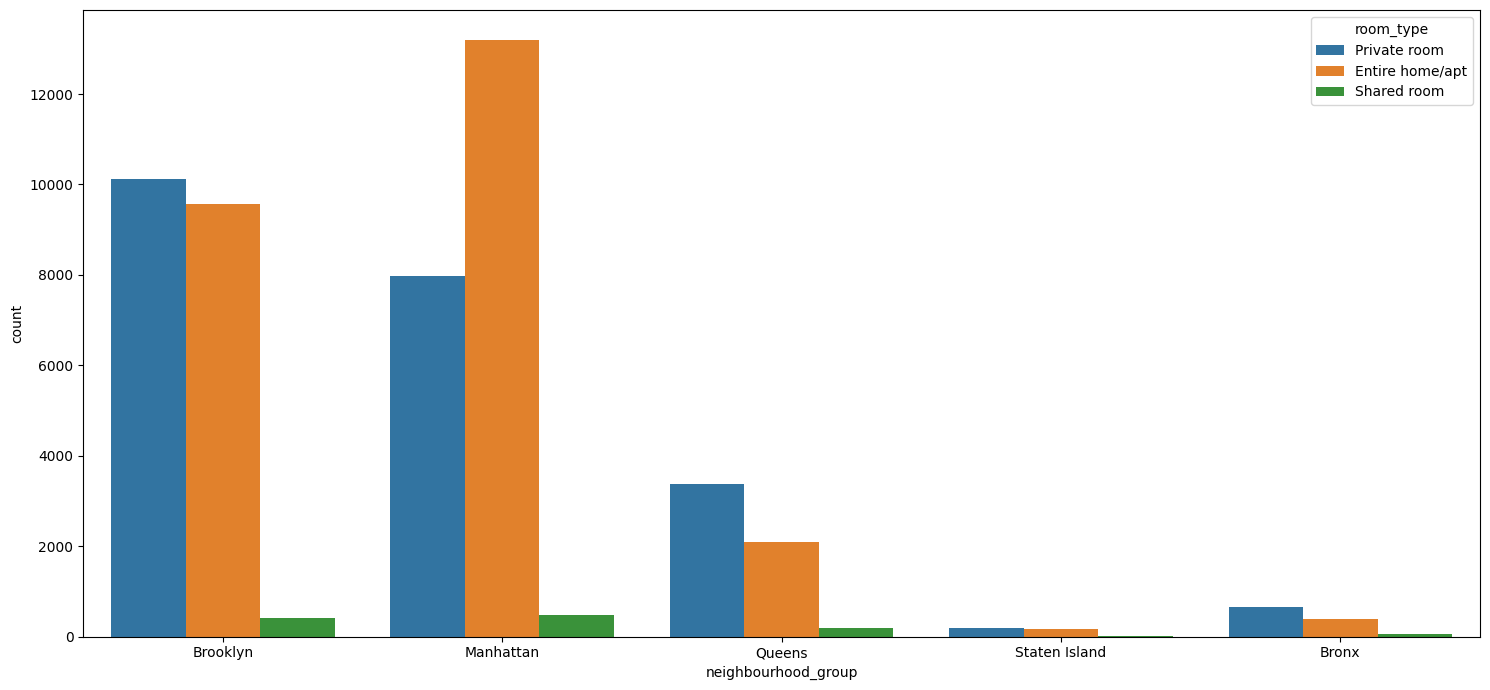

In [134]:
# Analysis of multivariate variables

# Categorical-categorical analysis

fig, axis = plt.subplots(figsize = (15, 7))

sns.countplot(data = total_data, x = "neighbourhood_group", hue = "room_type")

plt.tight_layout()

plt.show()

In [135]:
# The only Neighbourhood Group that the number of Entire Home/Apt surpasses the number of Private Rooms is in Manhattan. Share Room is always the lower.

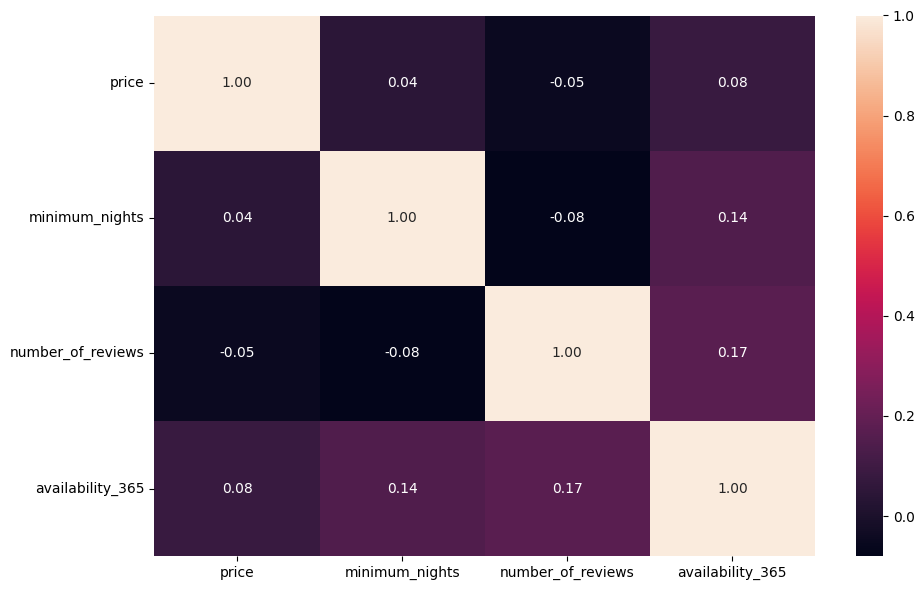

In [136]:
# Correlation analysis

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data[["price", "minimum_nights", "number_of_reviews", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In [137]:
# There's no appreciable correlation between the variables

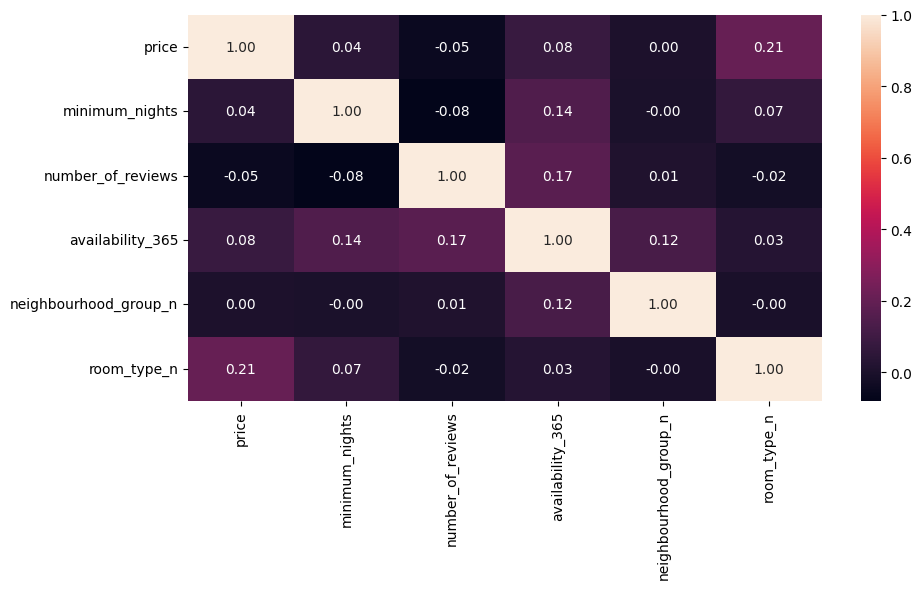

In [138]:
# Numerical-categorical analysis

# Define the mapping of categories to numerical labels
neighbourhood_group_mapping = {
    "Brooklyn": 0,
    "Manhattan": 1,
    "Queens": 2,
    "Staten Island": 3,
    "Bronx": 4
}

room_type_mapping = {
    "Private room": 0,
    "Entire home/apt": 1,
    "Shared room": 2
}

total_data["neighbourhood_group_n"] = pd.factorize(total_data['neighbourhood_group'].map(neighbourhood_group_mapping))[0]
total_data["room_type_n"] = pd.factorize(total_data['room_type'].map(room_type_mapping))[0]

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data[["price", "minimum_nights", "number_of_reviews", "availability_365", "neighbourhood_group_n", "room_type_n"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

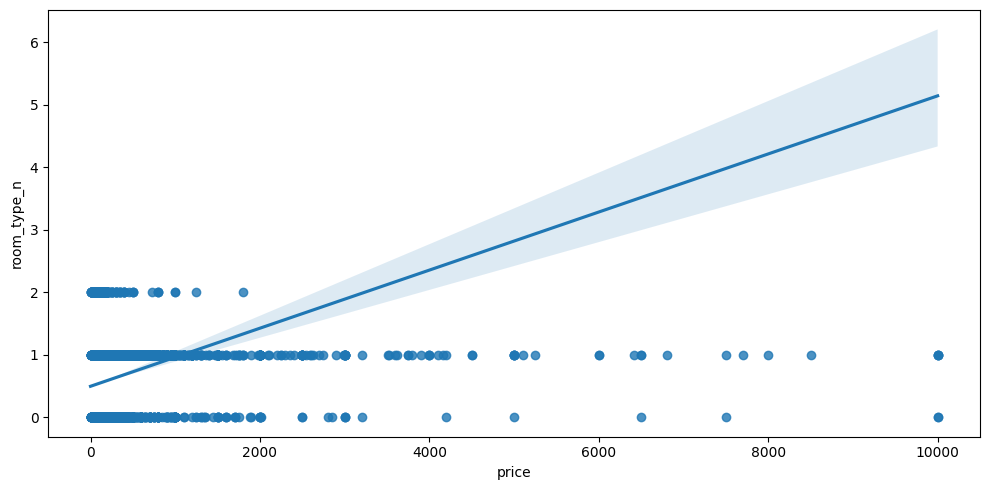

In [139]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.regplot(data = total_data, x = "price", y = "room_type_n")

plt.tight_layout()

plt.show()

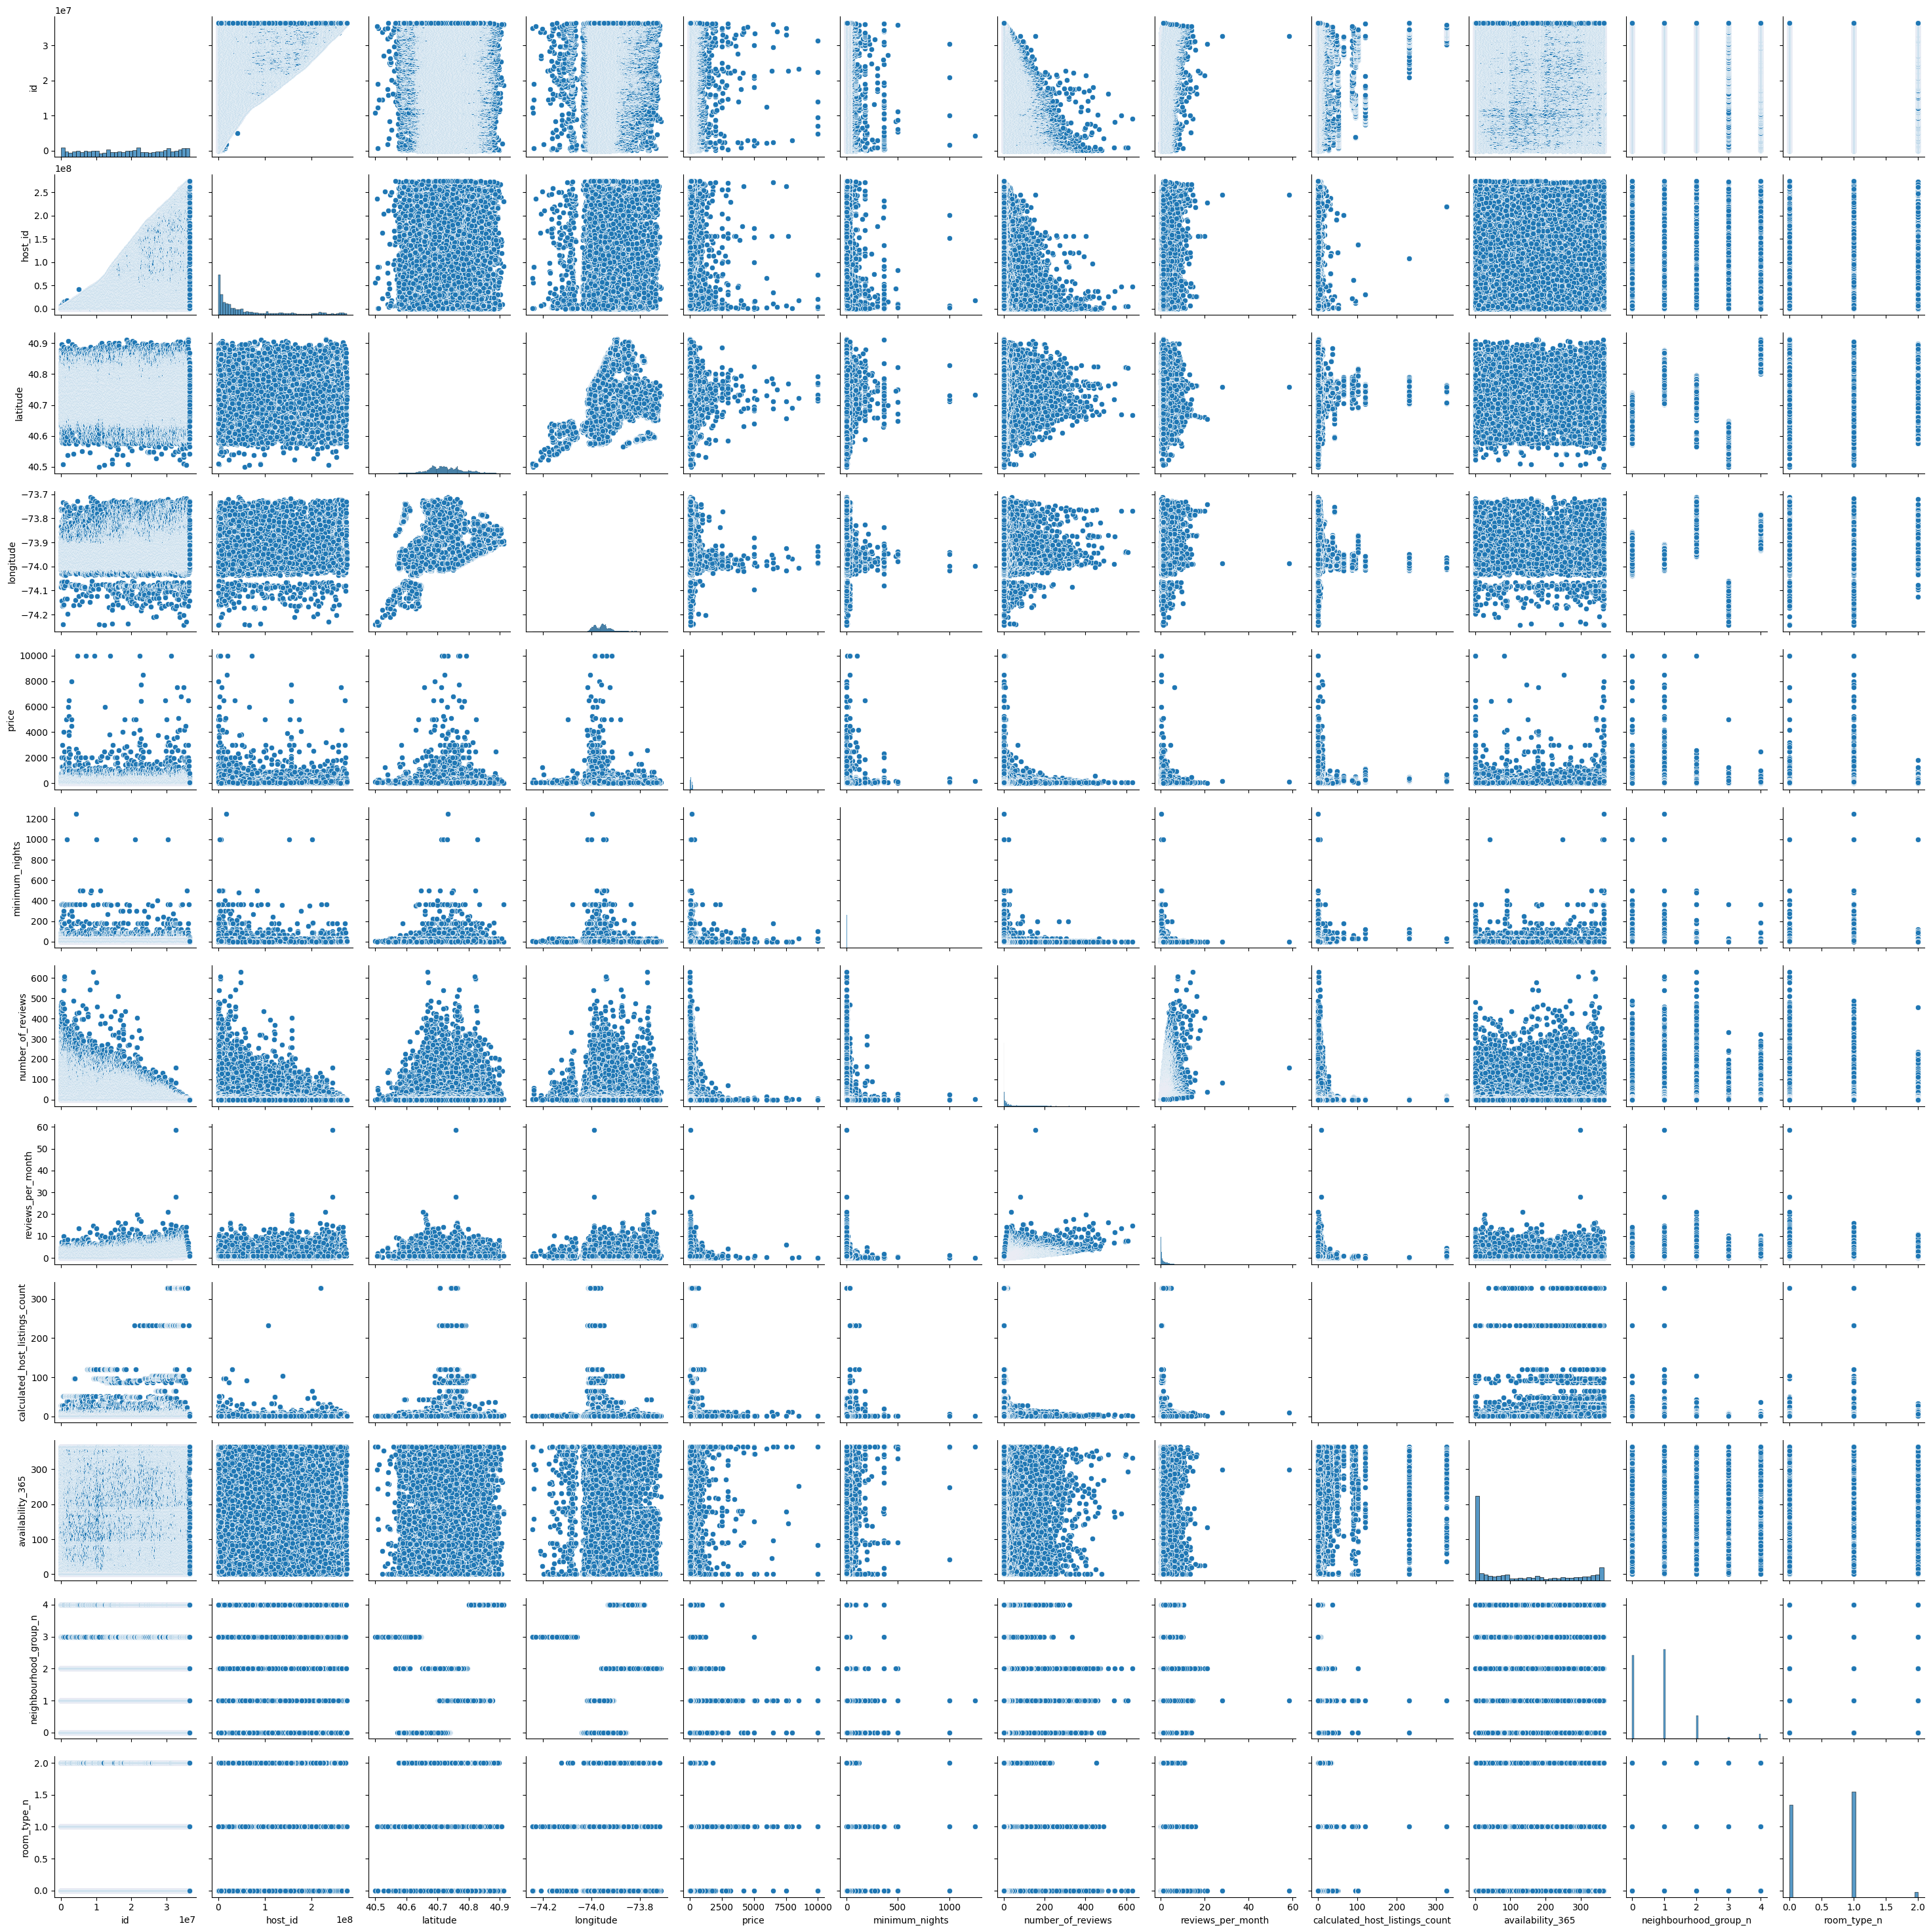

In [140]:
sns.pairplot(data = total_data)

In [141]:
# Feature Engineering

total_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


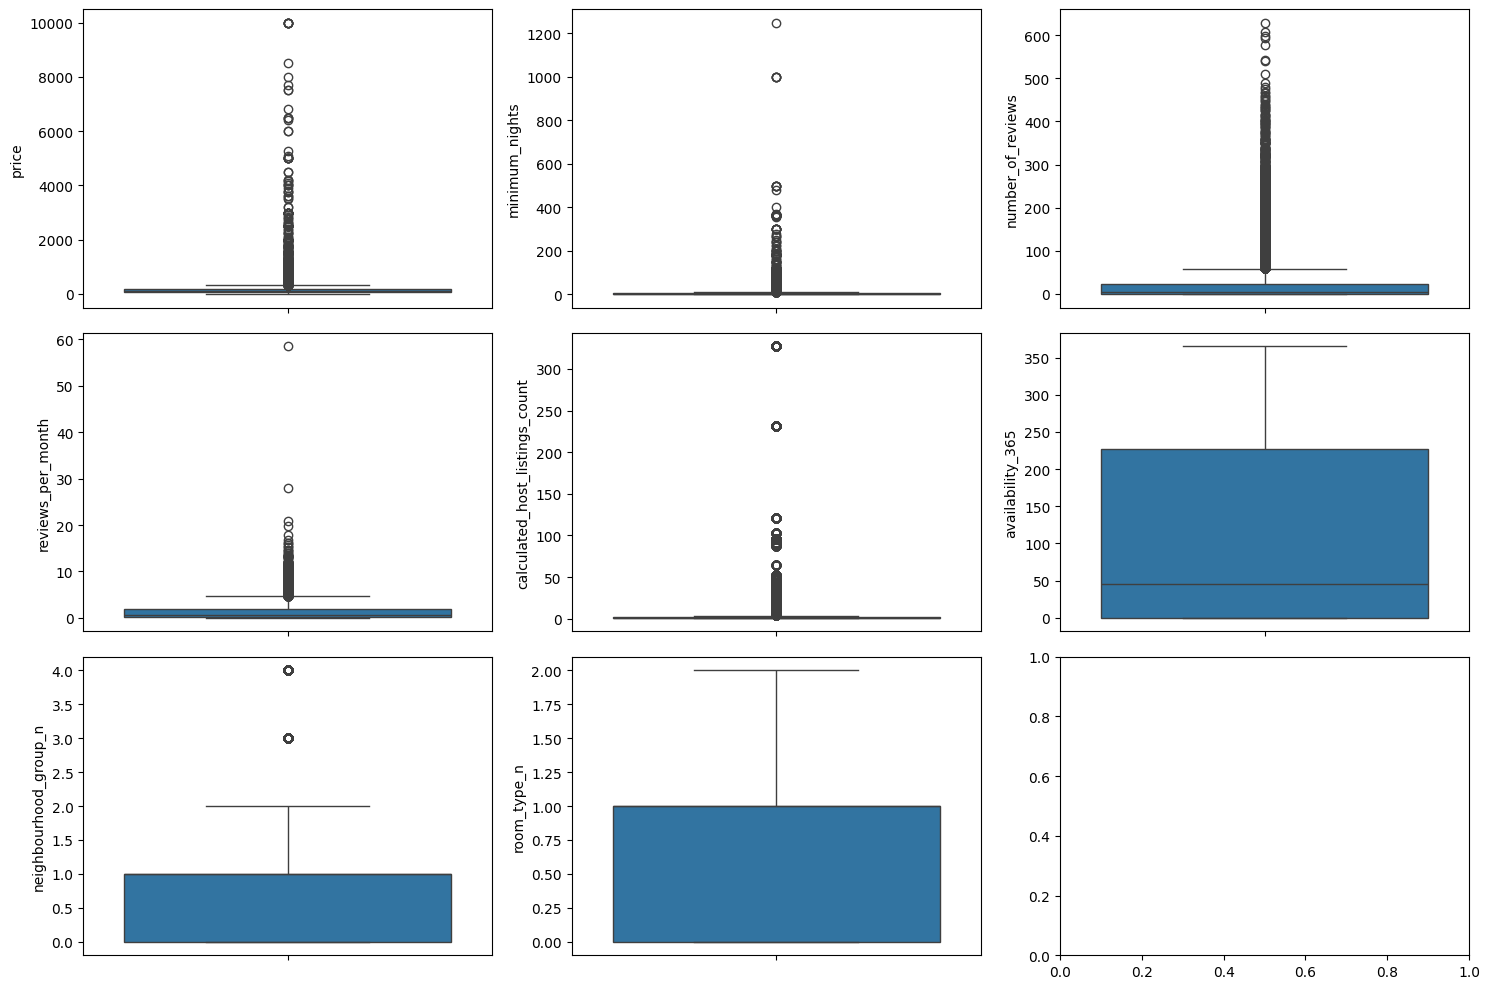

In [142]:
fig, axis = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = total_data, y = "price")
sns.boxplot(ax = axis[0, 1], data = total_data, y = "minimum_nights")
sns.boxplot(ax = axis[0, 2], data = total_data, y = "number_of_reviews")
sns.boxplot(ax = axis[1, 0], data = total_data, y = "reviews_per_month")
sns.boxplot(ax = axis[1, 1], data = total_data, y = "calculated_host_listings_count")
sns.boxplot(ax = axis[1, 2], data = total_data, y = "availability_365")
sns.boxplot(ax = axis[2, 0], data = total_data, y = "neighbourhood_group_n")
sns.boxplot(ax = axis[2, 1], data = total_data, y = "room_type_n")

plt.tight_layout()

plt.show()

In [143]:
price_stats = total_data["price"].describe()
price_stats

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [144]:
price_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * price_iqr
lower_limit = price_stats["25%"] - 1.5 * price_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(price_iqr, 2)}")

The upper and lower limits for finding outliers are 334.0 and -90.0, with an interquartile range of 106.0


In [145]:
total_data[total_data["price"] != 0].describe().T

,count,mean,std,min,25%,50%,75%,max
id,48884.0,1.901679e+07,1.098432e+07,2539.00000,9.470548e+06,1.967574e+07,2.915297e+07,3.648724e+07
host_id,48884.0,6.762203e+07,7.861666e+07,2438.00000,7.817310e+06,3.079257e+07,1.074344e+08,2.743213e+08
latitude,48884.0,4.072895e+01,5.453177e-02,40.49979,4.069010e+01,4.072308e+01,4.076312e+01,4.091306e+01
longitude,48884.0,-7.395218e+01,4.615874e-02,-74.24442,-7.398308e+01,-7.395569e+01,-7.393629e+01,-7.371299e+01
price,48884.0,1.527551e+02,2.401703e+02,10.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48884.0,7.029887e+00,2.051222e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48884.0,2.327199e+01,4.455133e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38833.0,1.373128e+00,1.680391e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48884.0,7.144628e+00,3.295619e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48884.0,1.127795e+02,1.316273e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


In [146]:
total_data.isnull().sum().sort_values(ascending=False)

reviews_per_month                 10052
id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
neighbourhood_group_n                 0
room_type_n                           0
dtype: int64

In [147]:
from sklearn.preprocessing import MinMaxScaler

num_variables = ["neighbourhood_group_n",
                "room_type_n",
                "price",
                "minimum_nights", 
                "number_of_reviews", 
                "calculated_host_listings_count",
                "availability_365"]

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(total_data[num_variables])
total_data_scal = pd.DataFrame(scal_features, index = total_data.index, columns = num_variables)
total_data_scal.head()

,neighbourhood_group_n,room_type_n,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,0.00,0.0,0.0149,0.000000,0.014308,0.015337,1.000000
1,0.25,0.5,0.0225,0.000000,0.071542,0.003067,0.972603
2,0.25,0.0,0.0150,0.001601,0.000000,0.000000,1.000000
3,0.00,0.5,0.0089,0.000000,0.429253,0.000000,0.531507
4,0.25,0.5,0.0080,0.007206,0.014308,0.000000,0.000000


In [149]:
# Feature selection

from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

X = total_data_scal.drop("price", axis = 1)
y = total_data_scal["price"].astype('int64')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 9090)

selection_model = SelectKBest(chi2, k = 4)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,neighbourhood_group_n,room_type_n,number_of_reviews,availability_365
0,0.00,0.0,0.000000,0.000000
1,0.00,0.0,0.023847,0.000000
2,0.25,0.5,0.017488,0.430137
3,0.25,0.5,0.000000,0.000000
4,0.25,0.0,0.197138,0.950685


In [151]:
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)